In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from QEB import QEB
from QEB import generate_grid_points

ImportError: cannot import name 'QEB' from 'QEB' (/Users/zhengshucheng/Desktop/中研院/QEB/QEB/__init__.py)

In [2]:
random.seed(0)
np.random.seed(0)

In [28]:
qeb = QEB()
data = qeb.read_data(
    root_map='./dataset/emd_11103.map', 
    root_pdb='./dataset/6z6u.pdb',
    max_rad = 0.8, 
    atomic="CA",
    base_num_points=2, 
    max_points=20
    )

/Users/zhengshucheng/Desktop/中研院/QEB/QEB/utils.py:69: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = gb_defected.mean().reset_index()


  0%|          | 0/4128 [00:00<?, ?it/s]

In [32]:
qeb = QEB()
data = qeb.read_data(
    root_map='./dataset/emd_3488.map', 
    root_pdb='./dataset/5ni1.pdb',
    atomic="CA",
    max_rad = 0.8, 
    base_num_points=2, 
    max_points=20
    )

/Users/zhengshucheng/Desktop/中研院/QEB/QEB/utils.py:69: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df = gb_defected.mean().reset_index()


  0%|          | 0/574 [00:00<?, ?it/s]

In [33]:
beta_j = qeb.estimate_beta_j_by_Bayse()

In [6]:
np.sqrt(1/17.303326588054805) 

0.2404004064321948

In [34]:
qscores = qeb.calculate_qeb_score()

In [37]:
qeb.estimated_A_ij_tilde["VAL"]

array([-1.86772717, -1.29135367, -1.86356526, -1.15713432, -0.82914101,
       -1.44777736, -1.26401569, -1.24644841, -0.84355119, -0.9747523 ,
       -1.12661091, -0.85017969, -0.92662788, -2.12746286, -1.32667936,
       -1.67550158, -2.15030681, -1.18516252, -1.29162615, -0.88281582,
       -1.41196782, -1.31896295, -1.06299407, -1.35449332, -0.89582949,
       -0.88309096, -1.05946075, -1.2246444 , -1.06530535, -1.21949494,
       -0.91565663, -1.86992579, -1.29176928, -1.85272231, -1.16395432,
       -0.83523864, -1.45337955, -1.26366091, -1.24644947, -0.84267272,
       -0.96882791, -1.12598409, -0.85287855, -0.92432461, -2.12659617,
       -1.32869642, -1.67997582, -2.16301085, -1.1869248 , -1.28568346,
       -0.88211857, -1.40230425, -1.31637062, -1.05501956, -1.34864799,
       -0.90276689, -0.87482965, -1.06124018, -1.22689967, -1.06663032,
       -1.2167808 , -0.91618085])

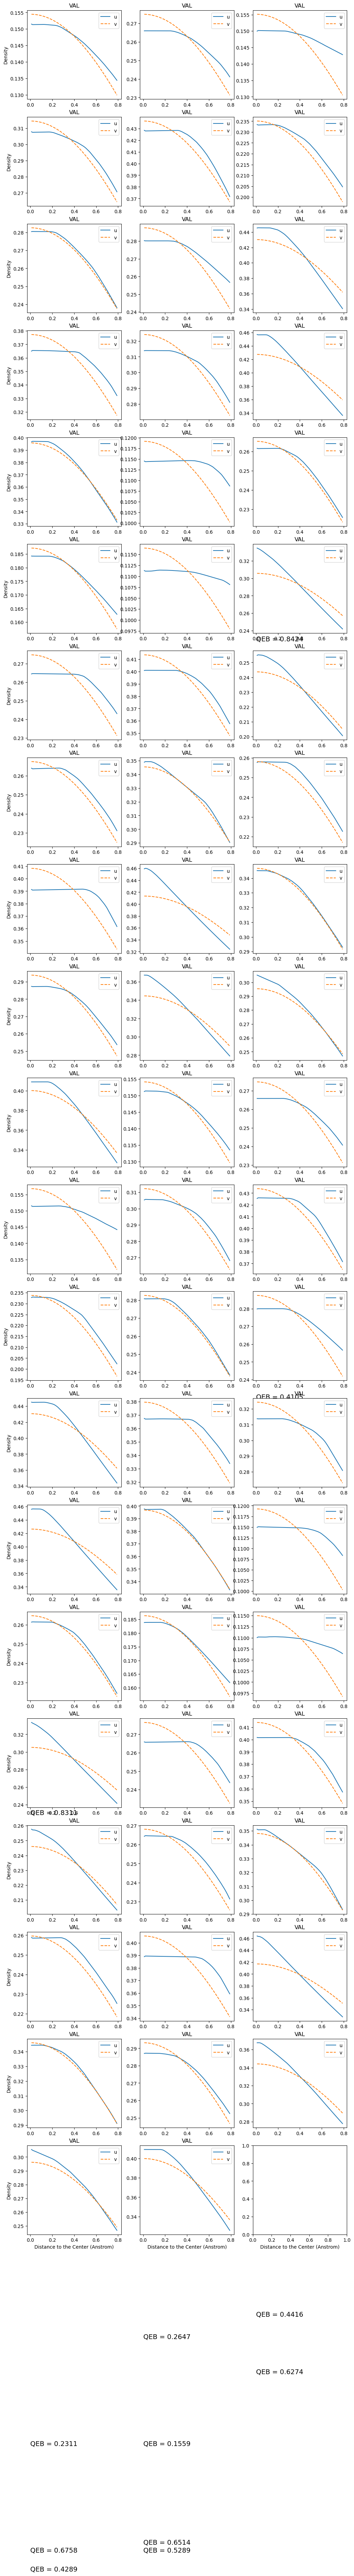

In [35]:
qeb.plot_data(max_rad = 0.8, amino_acid="VAL")

In [7]:
non_polar_name = ["ALA", "VAL", "CYS", "PRO", "LEU", "ILE", "MET", "TRP", "PHE"]
non_polar = [beta_1j[item] for item in non_polar_name]

In [15]:
polar_name = ["SER", "THR", "TYR", "ASN", "GLN"]
polar = [beta_1j[item] for item in polar_name]

In [16]:
positive_charge_name = ["LYS", "ARG", "HIS"]
positive_charge = [beta_1j[item] for item in positive_charge_name]

In [17]:
negative_charge_name = ["ASP", "GLU"]
negative_charge = [beta_1j[item] for item in negative_charge_name]

In [18]:
non_polar

[4.483479706401933,
 4.821636794568323,
 4.349609458485702,
 4.651878693294168,
 4.751258125399713,
 5.180678755685659,
 4.655224090387295,
 4.258008242634094,
 4.661280878737741]

In [19]:
polar

[4.390616549026835,
 4.385307326459269,
 4.634984001057536,
 4.686877603477805,
 4.533179970911908]

In [20]:
positive_charge

[4.6777117322827895, 4.715932639715448, 4.370305216795406]

In [21]:
negative_charge

[4.667454643152458, 4.578365704818243]

In [22]:
upper_bound = 0.9
lower_bound = 0.8
for amino_acid, qscore in qscores.items():
    worse_fit = np.where(np.array(qscore) < lower_bound)
    better_fit = np.where(np.array(qscore) > upper_bound)
    worse_ratio = len(worse_fit[0]) / len(qscore)
    better_ratio = len(better_fit[0]) / len(qscore)
    print(f"{amino_acid}: the ratio of qscore less than {lower_bound} is {worse_ratio} \
          the ratio of qscore greater than {upper_bound} is {better_ratio}")


SER: the ratio of qscore less than 0.8 is 0.125           the ratio of qscore greater than 0.9 is 0.5
THR: the ratio of qscore less than 0.8 is 1.0           the ratio of qscore greater than 0.9 is 0.0
GLN: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greater than 0.9 is 0.9
VAL: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greater than 0.9 is 1.0
ARG: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greater than 0.9 is 1.0
ASN: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greater than 0.9 is 1.0
TYR: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greater than 0.9 is 0.8571428571428571
HIS: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greater than 0.9 is 1.0
ASP: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greater than 0.9 is 0.75
GLU: the ratio of qscore less than 0.8 is 0.0           the ratio of qscore greate

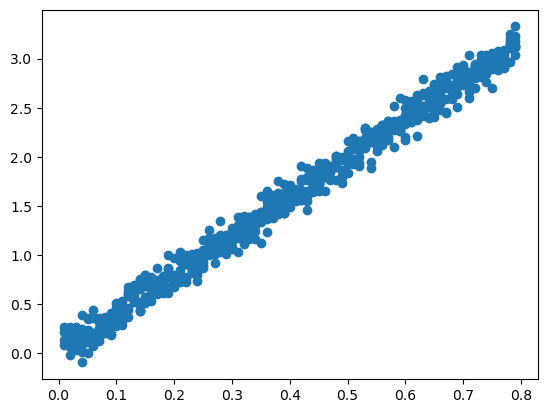

In [16]:
plt.scatter(qeb.distances_to_center["ALA"][0], qeb.distances_to_center["ALA"][0]*4+np.random.normal(0, 0.1, qeb.distances_to_center["ALA"][0].shape))

In [18]:
qeb.beta_1j_hat

{'SER': 4.4446061317545436,
 'THR': 4.5764364599564304,
 'GLN': 4.614181218816879,
 'VAL': 4.834717019324867,
 'ARG': 4.711058980858113,
 'ASN': 4.839989744810264,
 'TYR': 4.642270549426001,
 'HIS': 4.320399995197871,
 'ASP': 4.462819013210652,
 'GLU': 4.534134560296487,
 'ALA': 4.611341174492757,
 'ILE': 5.314832229985231,
 'LEU': 4.97061454209115,
 'MET': 4.736198303698116,
 'PHE': 4.554423362076253,
 'LYS': 4.538198991546668,
 'PRO': 4.8296678182037365,
 'TRP': 4.280750686343253,
 'CYS': 4.565527990704017}

In [25]:
qeb.estimated_means_of_error

{'SER': array([ 3.19631087e-16,  8.52113850e-17, -4.24289054e-17,  7.63720297e-17,
         8.91007013e-17,  1.67594176e-16,  1.14558045e-16,  1.48501169e-17]),
 'THR': array([-1.88808629e-16]),
 'GLN': array([ 4.80860928e-17, -1.92344371e-16, -1.76787106e-17, -6.50576549e-17,
         6.82398229e-17,  1.43197556e-16, -3.88931633e-17, -1.76787106e-18,
         2.84627240e-16,  2.70130698e-16]),
 'VAL': array([-1.35772497e-16,  6.08147644e-17,  5.58647254e-17,  5.65718739e-17]),
 'ARG': array([ 4.95003896e-18,  3.96003117e-17, -1.98708707e-16,  1.18800935e-16,
         5.19754091e-17,  1.47440446e-16]),
 'ASN': array([ 8.83935529e-17,  8.62721076e-17,  7.31898618e-17, -1.09608006e-16,
         9.33435919e-17,  5.79861707e-17, -4.15449699e-17]),
 'TYR': array([-1.76787106e-17,  2.70130698e-16,  1.63351286e-16, -5.37432802e-17,
         3.81860149e-17, -9.65257598e-17,  1.61936989e-16]),
 'HIS': array([ 1.88101481e-16,  2.93466596e-17,  1.41429685e-16,  3.53574212e-17,
        -3.46502727

In [9]:
qeb.A_B

(0.20189192797988653, -0.013362833)

In [9]:


start_rad, max_rad, gap = 0.01, 0.8, 0.01
x_axis = np.arange(start_rad, max_rad, gap)
(2*np.pi*0.6**2)**(-3/2)*np.exp(-1/(2*0.6**2)*x_axis**2)*qeb.A_B[0]

array([0.0593383 , 0.05931358, 0.0592724 , 0.0592148 , 0.05914083,
       0.05905055, 0.05894402, 0.05882135, 0.05868263, 0.05852798,
       0.05835752, 0.0581714 , 0.05796977, 0.05775279, 0.05752064,
       0.05727351, 0.05701161, 0.05673514, 0.05644433, 0.05613942,
       0.05582065, 0.05548827, 0.05514255, 0.05478376, 0.05441219,
       0.05402813, 0.05363189, 0.05322376, 0.05280407, 0.05237314,
       0.05193129, 0.05147888, 0.05101623, 0.0505437 , 0.05006163,
       0.0495704 , 0.04907035, 0.04856185, 0.04804528, 0.04752099,
       0.04698938, 0.04645081, 0.04590565, 0.0453543 , 0.04479712,
       0.0442345 , 0.04366681, 0.04309443, 0.04251775, 0.04193713,
       0.04135295, 0.04076559, 0.0401754 , 0.03958277, 0.03898804,
       0.03839158, 0.03779375, 0.0371949 , 0.03659537, 0.0359955 ,
       0.03539563, 0.03479609, 0.0341972 , 0.03359929, 0.03300266,
       0.03240763, 0.03181448, 0.03122352, 0.03063502, 0.03004927,
       0.02946653, 0.02888706, 0.02831113, 0.02773897, 0.02717

In [20]:
qeb_scores = qeb.calculate_qeb_score()
for score in qeb_scores.values():
    print(np.array(score)[np.array(score) < 0.8])

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


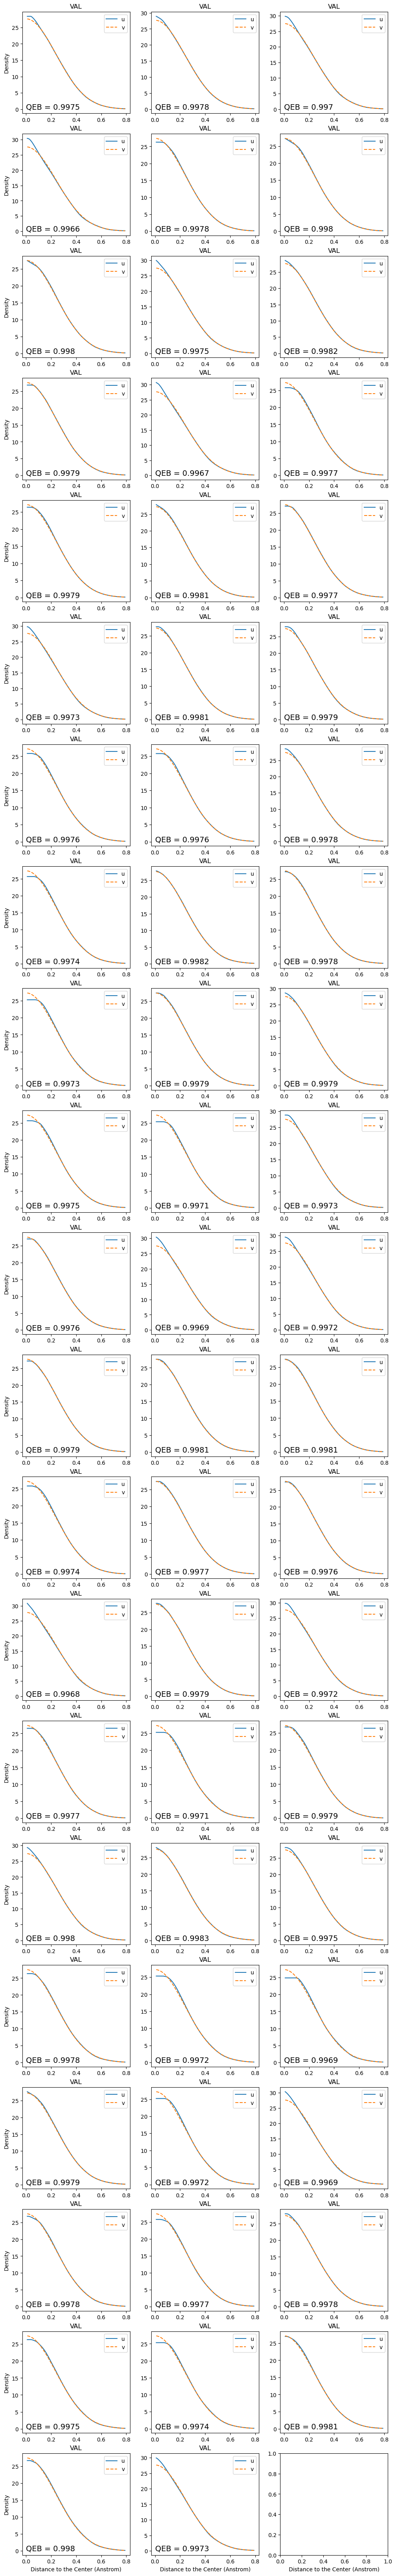

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [12]:
qeb.plot_data(max_rad = 0.8, amino_acid="VAL")

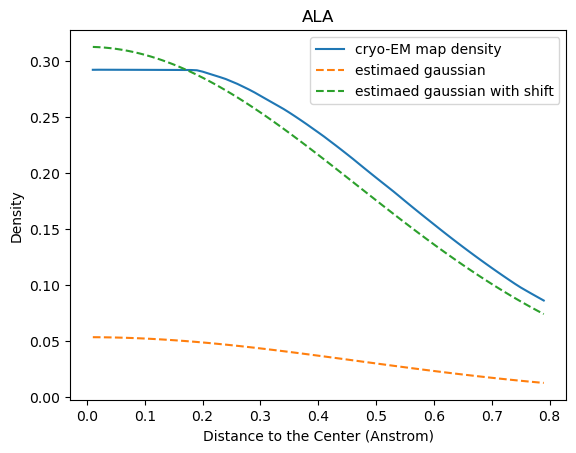

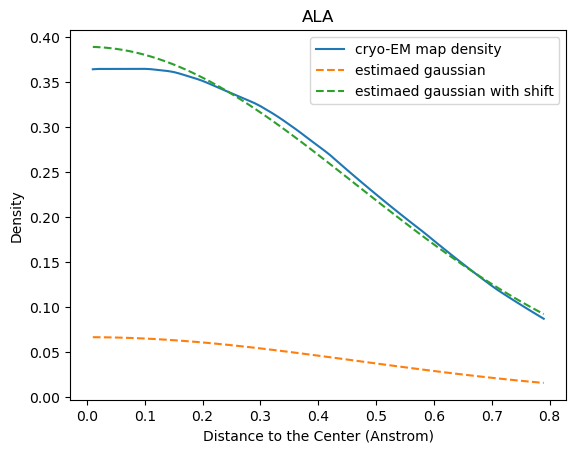

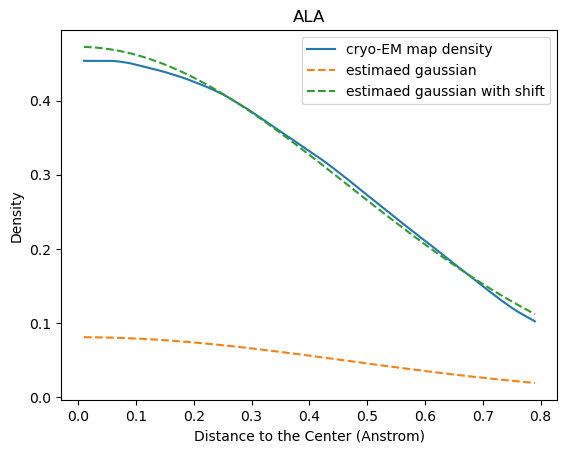

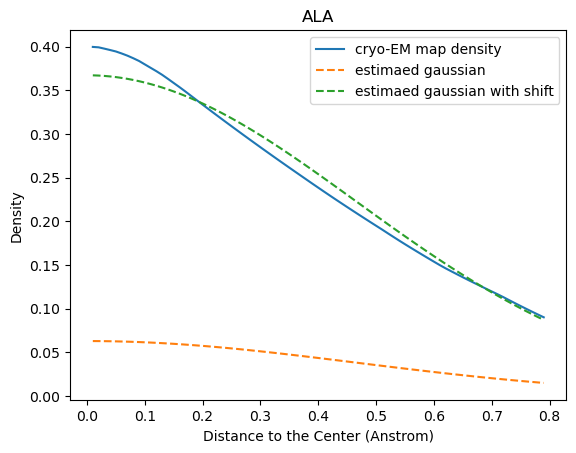

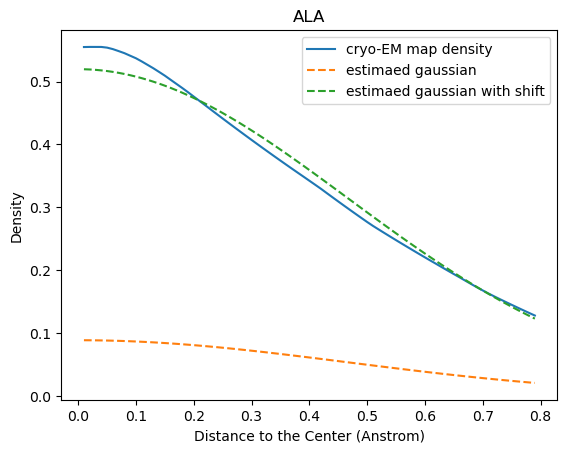

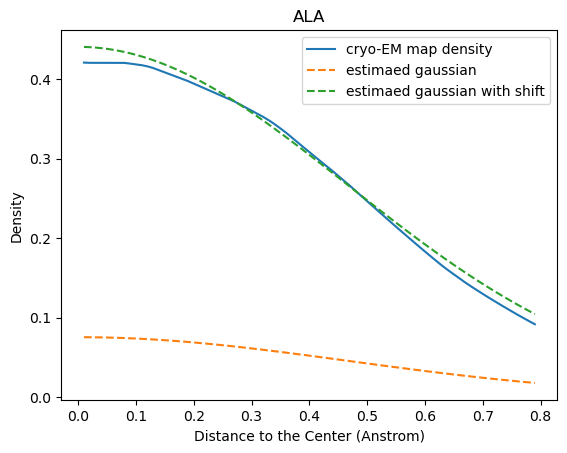

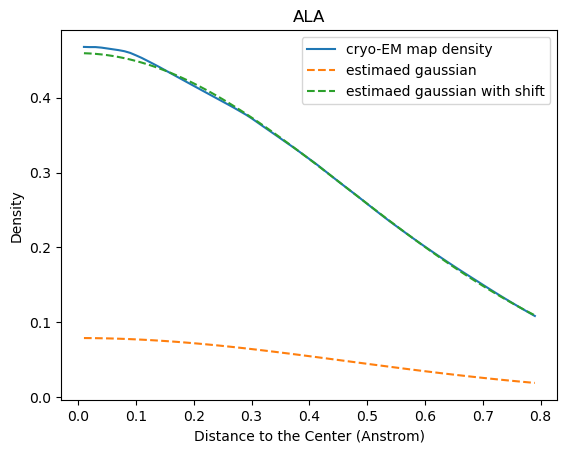

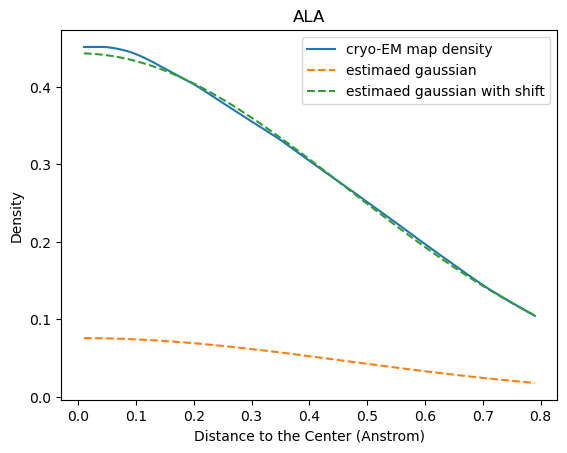

In [7]:
qeb.plot_data(max_rad = 0.8, amino_acid="ALA")

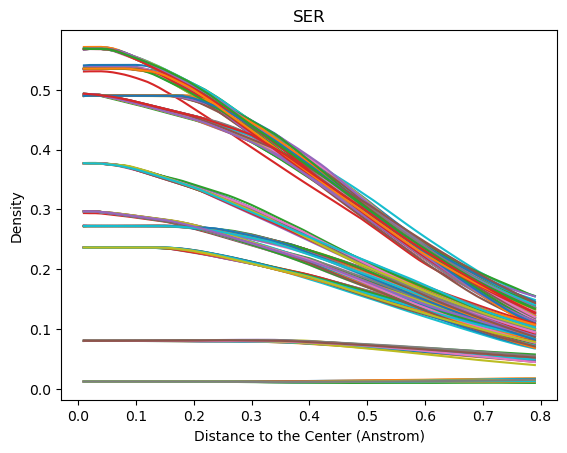

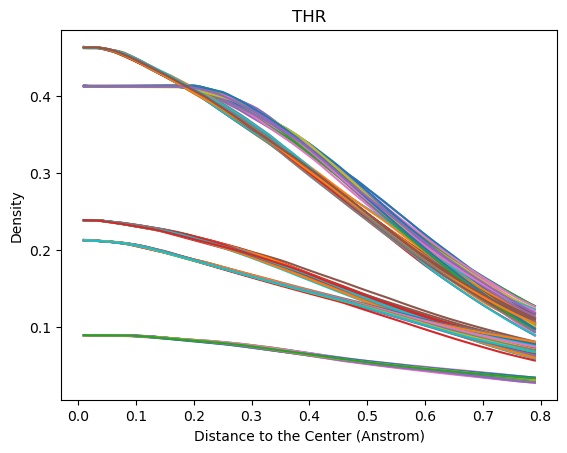

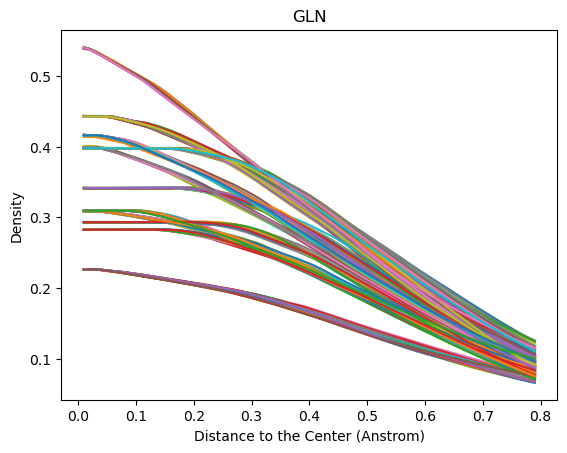

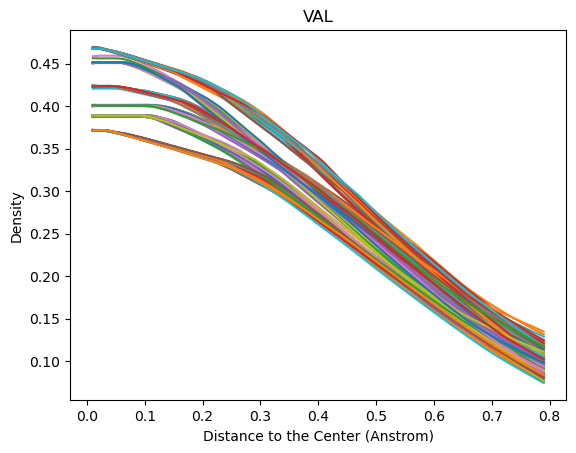

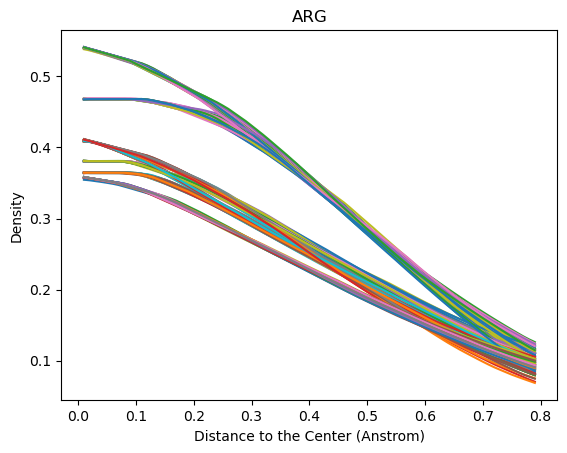

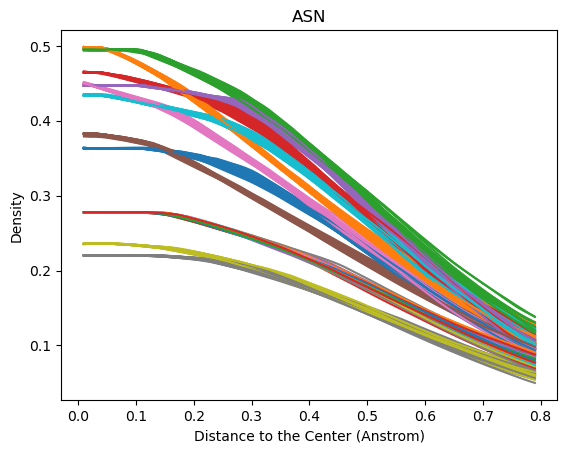

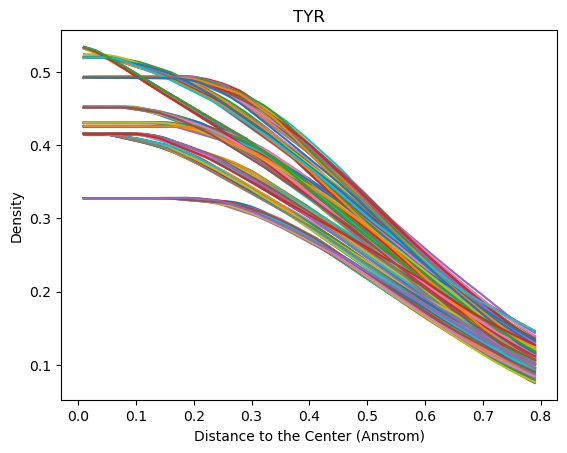

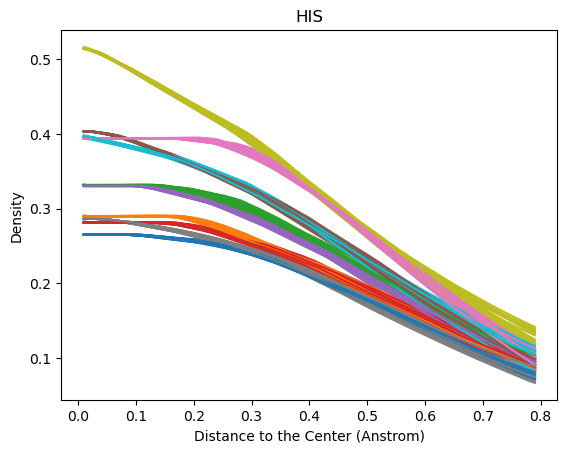

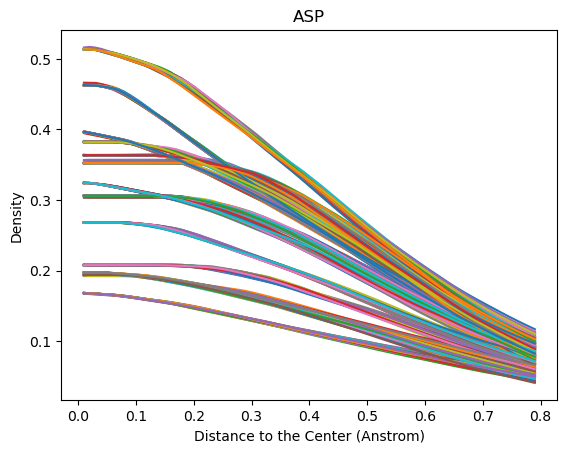

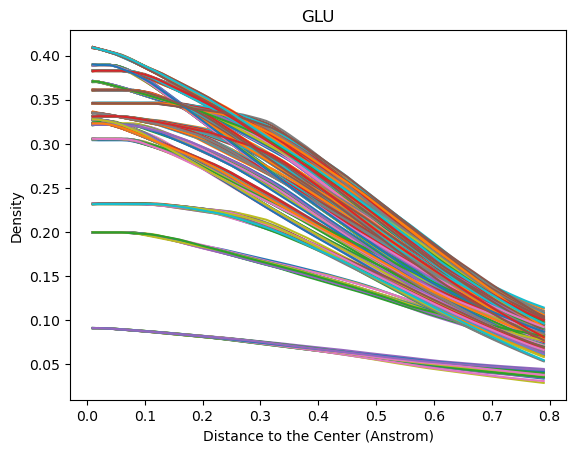

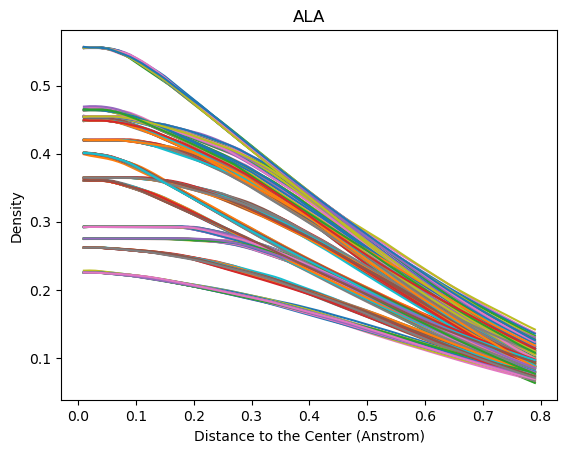

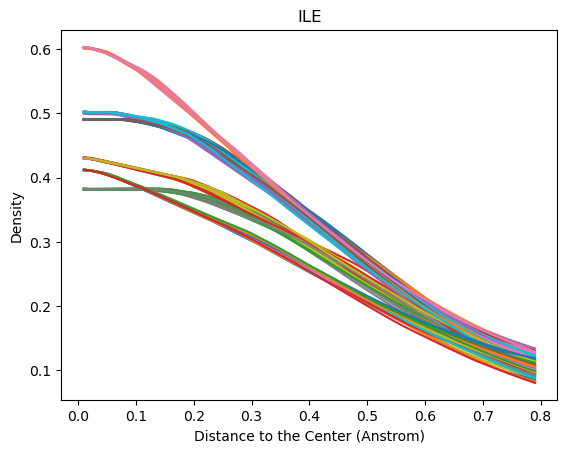

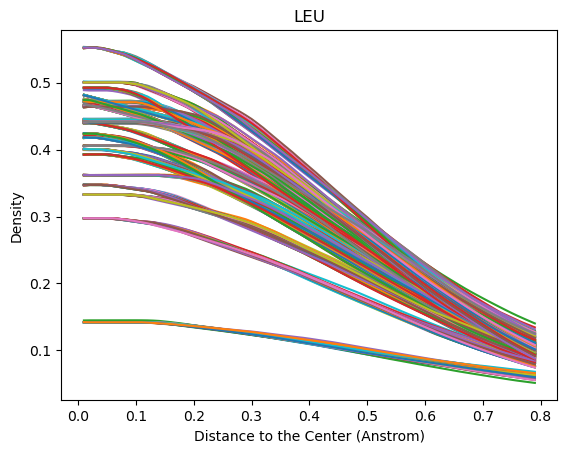

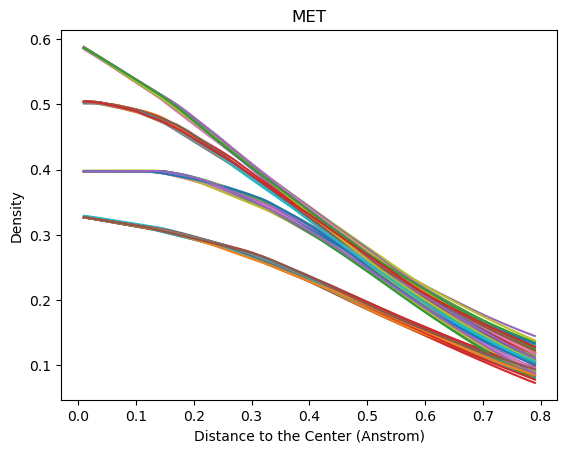

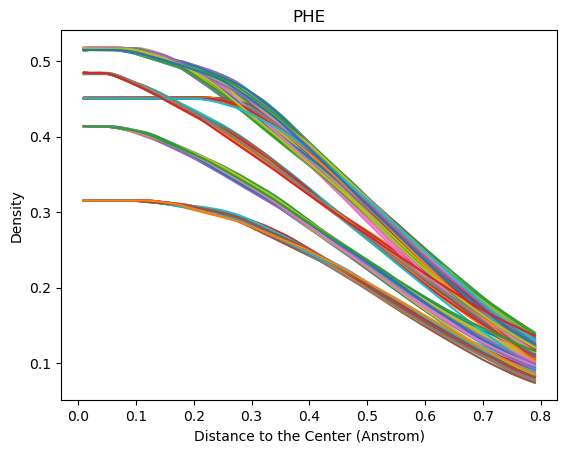

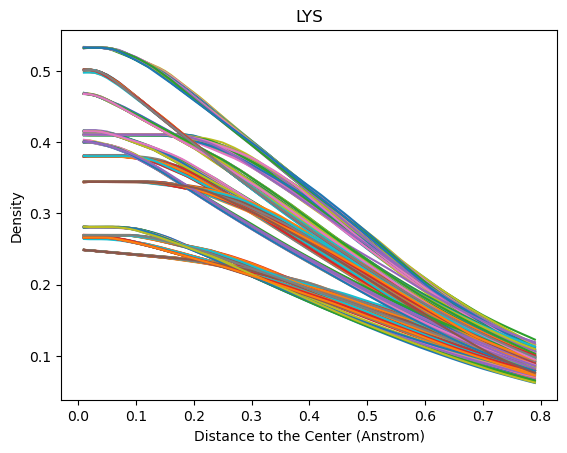

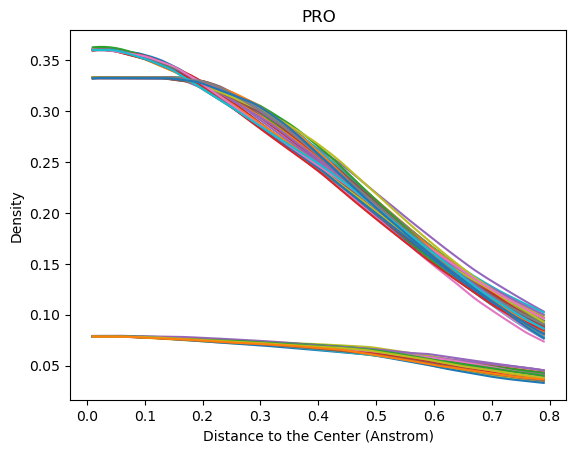

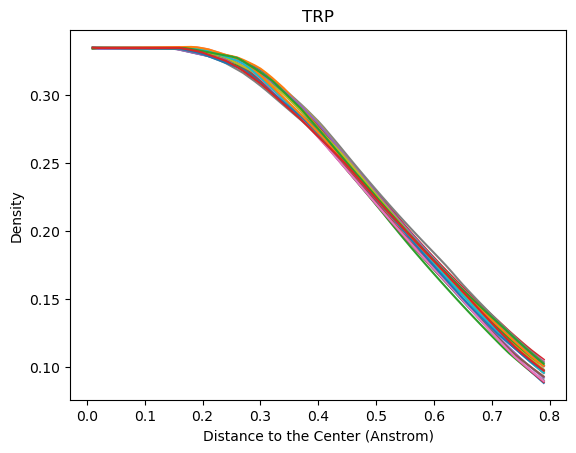

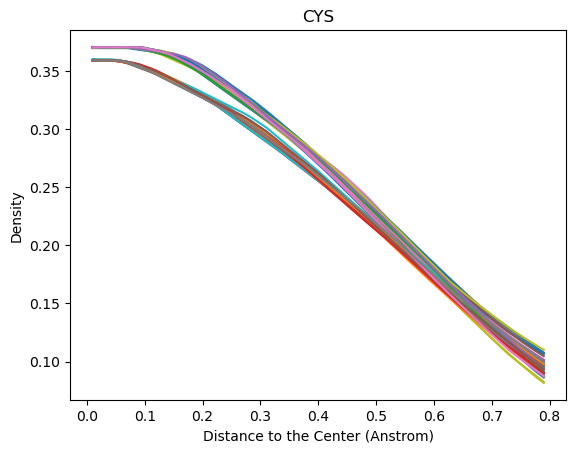

In [22]:
qeb.plot_data(max_rad=0.8, compared=True, estimated=False)

In [17]:
qeb.estimated_A_ij_tilde["ARG"]

array([-0.86504073, -0.76978182, -0.69246   ,  0.28778166,  0.23616074,
       -0.86713668])

In [36]:
qeb.data_log["ARG"][3]

array([ -0.89353519,  -0.91118832,  -0.90249348,  -0.91325802,
        -0.88147076,  -0.90614888,  -0.88720668,  -0.90328795,
        -0.91923655,  -0.89766852,  -0.92898209,  -0.9220697 ,
        -0.86959507,  -0.90659502,  -0.87811791,  -0.90221152,
        -0.92609574,  -0.89382371,  -0.94079815,  -0.9305449 ,
        -0.85781898,  -0.90713119,  -0.86907368,  -0.90116282,
        -0.9329562 ,  -0.89003286,  -0.95267504,  -0.93915998,
        -0.84614145,  -0.90775782,  -0.86007225,  -0.90014158,
        -0.93981715,  -0.88629474,  -0.96461466,  -0.94791854,
        -0.83456148,  -0.90847537,  -0.85111194,  -0.89914754,
        -0.94667776,  -0.88260812,  -0.97661903,  -0.95682433,
        -0.82307807,  -0.90928431,  -0.8421911 ,  -0.89818045,
        -0.9535372 ,  -0.87897181,  -0.98869021,  -0.9658812 ,
        -0.81169024,  -0.91018517,  -0.83330816,  -0.89724003,
        -0.96039461,  -0.88766524,  -1.00083035,  -0.97509319,
        -0.80039703,  -0.91117846,  -0.82786116,  -0.89

In [15]:
qeb.data_log["ARG"][3].min()

-80.5904782547916

In [16]:
np.where(qeb.data["ARG"][3] == qeb.data["ARG"][3].min())

(array([704, 712, 720, 728, 736, 744, 752, 760, 768, 776, 784]),)

In [17]:
qeb.distances_to_center["ARG"][3][704]

0.89

In [19]:
np.cov(qeb.data_log["ARG"][3], qeb.distances_to_center["ARG"][3])

array([[ 8.64850198e+01, -6.48137504e-01],
       [-6.48137504e-01,  8.09589897e-02]])

In [20]:
np.cov(qeb.data_log["ARG"][0], qeb.distances_to_center["ARG"][0])

array([[ 0.71045408, -0.20779484],
       [-0.20779484,  0.08095899]])

In [22]:
qeb.radius_density["SER"][0]

[0.005745788987994719,
 0.005746008962176432,
 0.005743239400452797,
 0.005740186368131624,
 0.005736848374843709,
 0.005733223930219644,
 0.0057293115438904,
 0.005725109725486848,
 0.005720616984639524,
 0.005715831830979282,
 0.0057107527741370925,
 0.005705378323743439,
 0.005699706989429235,
 0.005693737280825313,
 0.005687467707562438,
 0.005680896779271283,
 0.005674023005582736,
 0.005666844896127557,
 0.005659360960536478,
 0.005688230201358788,
 0.005777523827411505,
 0.005904171023874017,
 0.006030800103489335,
 0.006193642605238078,
 0.006367728345759241,
 0.006541523906540509,
 0.006738624573733035,
 0.006961423037499971,
 0.007185240976347281,
 0.007425461303595177,
 0.007726952714599651,
 0.008034835404825268,
 0.008342198345892525,
 0.008649017483287879,
 0.008955268762498247,
 0.009262024493089915,
 0.009591510965120242,
 0.009889435393883619,
 0.01018662345540587,
 0.010482951312749534,
 0.010778367812777915,
 0.011102776561281709,
 0.011471367730642813,
 0.0118392167

In [5]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().read_pdb('./dataset/5ni1.pdb')
df = ppdb.df['ATOM']
df

record_name  atom_number blank_1 atom_name alt_loc residue_name blank_2  \
0           ATOM            1                 N                  VAL           
1           ATOM            2                CA                  VAL           
2           ATOM            3                 C                  VAL           
3           ATOM            4                 O                  VAL           
4           ATOM            5                CB                  VAL           
...          ...          ...     ...       ...     ...          ...     ...   
4378        ATOM         4382               ND1                  HIS           
4379        ATOM         4383               CD2                  HIS           
4380        ATOM         4384               CE1                  HIS           
4381        ATOM         4385               NE2                  HIS           
4382        ATOM         4386               OXT                  HIS           

     chain_id  residue_number insertion  ... x_coord  y_coord  z_coord  \
0           A               1            ...  45.716   55.727   67.167   
1           A               1            ...  46.415   54.489   67.609   
2           A               1            ...  45.428   53.308   67.689   
3           A               1            ...  45.466   52.422   66.838   
4           A               1            ...  47.147   54.718   68.953   
...       ...             ...       ...  ...     ...      ...      ...   
4378        D             146            ...  52.162   49.811   36.145   
4379        D             146            ...  53.037   48.765   37.851   
4380        D             146            ...  52.998   50.650   36.730   
4381        D             146            ...  53.542   50.041   37.768   
4382        D             146            ...  51.896   48.338   33.799   

      occupancy  b_factor  blank_4 segment_id element_symbol charge  line_idx  
0           1.0     80.64                                  N    NaN       369  
1           1.0     80.57                                  C    NaN       370  
2           1.0     75.67                                  C    NaN       371  
3           1.0     78.47                                  O    NaN       372  
4           1.0     88.38                                  C    NaN       373  
...         ...       ...      ...        ...            ...    ...       ...  
4378        1.0    266.71                                  N    NaN      4750  
4379        1.0    258.76                                  C    NaN      4751  
4380        1.0    266.06                                  C    NaN      4752  
4381        1.0    259.46                                  N    NaN      4753  
4382        1.0    316.75                                  O    NaN      4754  

[4383 rows x 21 columns]

In [6]:
#paper method

def generate_points_on_sphere(radius, num_points):
    costheta = np.linspace(-1, 1, num_points)
    phi = []
    for k in range ( 1, num_points+1 ) :
        phi.append ( 0 if k == 1 or k == num_points else 
                       (phi[k-2] + 3.6/np.sqrt(num_points*(1.0-costheta[k-1]**2.0))) % (2*np.pi) )
    phi = np.array(phi)
    # phi = np.random.uniform(0, 2*np.pi, num_points)
    theta = np.arccos(costheta)

    x = radius * np.sin(theta) * np.cos(phi)
    y = radius * np.sin(theta) * np.sin(phi)
    z = radius * np.cos(theta)

    points = np.column_stack((x,y,z))
    return points


In [7]:
generate_points_on_sphere(1, 10)

array([[ 1.22464680e-16,  0.00000000e+00, -1.00000000e+00],
       [-1.49661092e-01,  6.10461535e-01, -7.77777778e-01],
       [-8.30854520e-01, -3.22302935e-02, -5.55555556e-01],
       [-3.00642729e-01, -8.93589860e-01, -3.33333333e-01],
       [ 7.27272948e-01, -6.77294899e-01, -1.11111111e-01],
       [ 9.17020208e-01,  3.83051249e-01,  1.11111111e-01],
       [-3.05065272e-02,  9.42315362e-01,  3.33333333e-01],
       [-8.19593999e-01,  1.40084624e-01,  5.55555556e-01],
       [ 4.46734542e-02, -6.26949767e-01,  7.77777778e-01],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [5]:
# my method
def generate_points_on_sphere(radius, num_points, center_x=0, center_y=0, center_z=0):
    n = np.arange(1, num_points+1)
    phi = (np.sqrt(5) - 1) / 2
    z = (2*n - 1) / num_points - 1
    x = np.sqrt(1 - z**2) * np.cos(2 * np.pi * n * phi)
    y = np.sqrt(1 - z**2) * np.sin(2 * np.pi * n * phi)
    points = np.column_stack((center_x+radius*x, center_y+radius*y, center_z+radius*z))
    return points 

In [10]:
generate_points_on_sphere(1, 10, 10, 10, 10)

array([[ 9.67858836,  9.70556061,  9.1       ],
       [10.06243446, 10.71140842,  9.3       ],
       [10.52692351,  9.31272159,  9.5       ],
       [ 9.0606432 , 10.16615899,  9.7       ],
       [10.83952592, 10.53403767,  9.9       ],
       [ 9.74169698,  9.03912563, 10.1       ],
       [ 9.56032272, 10.84657185, 10.3       ],
       [10.8134761 ,  9.70291983, 10.5       ],
       [ 9.33988524,  9.72751422, 10.7       ],
       [10.18475019, 10.39480042, 10.9       ]])

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display

def update_plot(radius, num_points, elevation, azimuth):
    points = generate_points_on_sphere(radius, num_points, 10, 10, 10)
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2])
    ax.view_init(elev=elevation, azim=azimuth)
    plt.show()

# 定義滑塊和滾動軸的範圍和初始值
radius_slider = widgets.IntSlider(min=1, max=50, step=1, value=100, description='Number of Radius:')
num_points_slider = widgets.IntSlider(min=10, max=500, step=1, value=100, description='Number of Points:')
elevation_slider = widgets.IntSlider(min=-90, max=90, step=5, value=30, description='Vertical:')
azimuth_slider = widgets.IntSlider(min=0, max=360, step=5, value=45, description='Horizon:')

# 創建互動控制面板
controls = widgets.VBox([radius_slider, num_points_slider, elevation_slider, azimuth_slider])

# 更新圖表函數與互動控制面板相關聯
out = widgets.interactive_output(update_plot, {'radius': radius_slider, 'num_points': num_points_slider, 'elevation': elevation_slider, 'azimuth': azimuth_slider})

# 顯示圖表和互動控制面板
display(out, controls)


Output()

In [11]:
df["residue_name"].unique()

array(['VAL', 'LEU', 'SER', 'PRO', 'ALA', 'ASP', 'LYS', 'THR', 'ASN',
       'TRP', 'GLY', 'HIS', 'GLU', 'TYR', 'ARG', 'MET', 'PHE', 'GLN',
       'CYS'], dtype=object)

In [12]:
new_df = df[df["residue_name"] == 'VAL']
num = new_df["residue_number"].unique()[0]
amino_acid = new_df[new_df["residue_number"] == num]
atom_points = np.column_stack((amino_acid.x_coord, amino_acid.y_coord, amino_acid.z_coord))

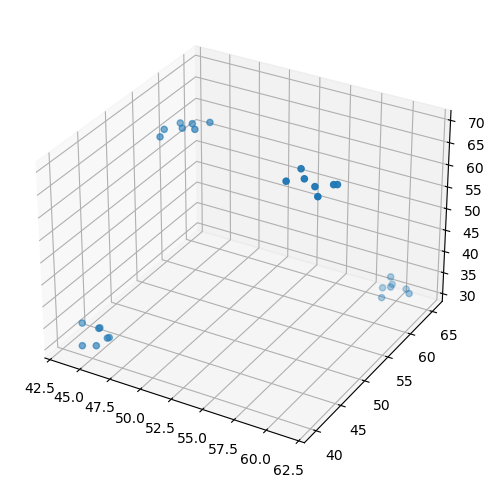

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(atom_points[:,0], atom_points[:,1], atom_points[:,2])
plt.show()


In [17]:
from mrcfile import open as mrc_open

with mrc_open('./dataset/emd_3488.map', permissive=True) as mrc:
    # 讀取資訊
    shape = mrc.data.shape  # 檔案的形狀
    header = mrc.header  # 檔案的 header 資訊
    # 讀取數據
    data = mrc.data  # 數據


In [28]:
data.min()

-0.54142815

In [31]:
df.x_coord.min()

19.382

In [66]:
header

rec.array((100, 100, 100, 2, 0, 0, 0, 100, 100, 100, (104.99999, 104.99999, 104.99999), (90., 90., 90.), 1, 2, 3, -0.54142815, 0.70043814, 0.00152298, 1, 0, b'\x00\x00\x00\x00\x00\x00\x00\x00', b'', 0, b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', (0., 0., 0.), b'MAP ', [68, 65,  0,  0], 0.03714918, 1, [b'::::EMDATABANK.org::::EMD-3488::::                                              ', b'                                                                                ', b'                                                                                ', b'                                                                                ', b'                                                          

In [70]:
header["cella"]

(104.99999237060547, 104.99999237060547, 104.99999237060547)

In [72]:
header["mx"],

(array(100, dtype=int32), array(100, dtype=int32), array(100, dtype=int32))

In [17]:
import numpy as np
from scipy.interpolate import RegularGridInterpolator

# 創建一個3D數據集
x = np.linspace(0, 1, 5)
y = np.linspace(0, 1, 5)
z = np.linspace(0, 1, 5)
data = np.random.rand(5, 5, 5)

# 定義3D內插函數
interp_func = RegularGridInterpolator((x, y, z), data)

# 定義要進行內插的點
points = np.array([0.2, 0.4, 0.6])

# 使用內插函數進行內插
result = interp_func(points)

print(result)


[0.45823359]
